#  Mall Customers Dataset


This dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score

Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.



The technique of customer segmentation is dependent on several key differentiators that divide customers into groups to be targeted. Data related to demographics, geography, economic status as well as behavioral patterns play a crucial role in determining the company direction towards addressing the various segments.

Customer Segmentation is one the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base. In this machine learning project, we will make use of K-means clustering which is the essential algorithm for clustering unlabeled dataset.

The dataset is from https://www.kaggle.com/shwetabh123/mall-customers

## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## UPLOADING THE DATA TO GOOGLE DRIVE

In [2]:
from google.colab import files
uploaded=files.upload()

Saving mall.csv to mall.csv


## LOADING THE DATA 

In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['mall.csv']))

## EDA

View top few rows

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Columns of the dataset

In [7]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Statistical info about the data

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Datatype of the features

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Size of the data set

In [11]:
data.shape

(200, 5)

Check for null values

In [12]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing data

Number of male and female

In [13]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

## PLOTTING FEW GRAPHS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff523562b38>,
      dtype=object)

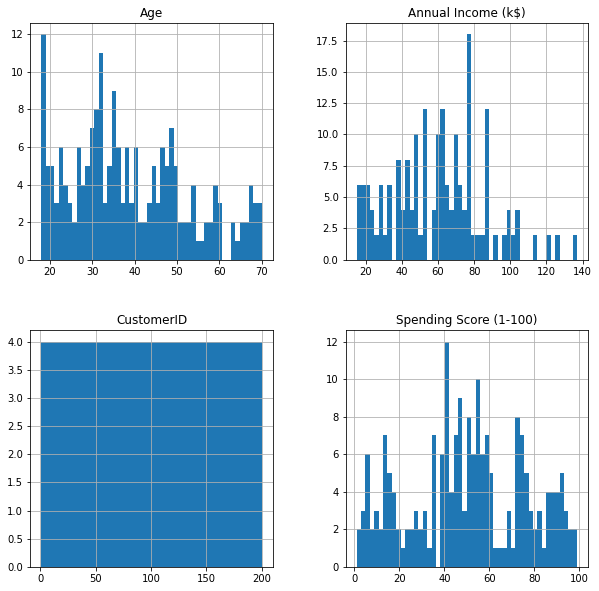

In [14]:
data.hist(bins=50,figsize=(10,10))

Plots male vs female

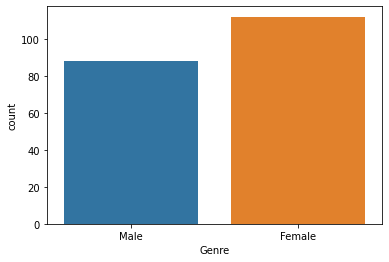

In [16]:
sns.countplot(x='Genre',data=data)

Correlation matrix

In [17]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.00,-0.03,0.98,0.01
Age,-0.03,1.00,-0.01,-0.33
Annual Income (k$),0.98,-0.01,1.00,0.01
Spending Score (1-100),0.01,-0.33,0.01,1.00


For the anylsis the CustomerID is not an important feature so we would remove this from the dataset

In [18]:
data=data.drop('CustomerID',axis=1)

In [19]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.00,-0.01,-0.33
Annual Income (k$),-0.01,1.00,0.01
Spending Score (1-100),-0.33,0.01,1.00


Rename the coulmns

In [24]:
data.columns=['gender','age','annual_income','spending_score']


In [25]:
data.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

data['gender']=label_encoder.fit_transform(data['gender'])

In [28]:
data

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## K-Means Algorithm


K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. In here we used elbow Method.

In [20]:
from sklearn.cluster import KMeans 

### FINDING THE OPTIMAL VALUE FOR NUMBER OF CLUSTERS

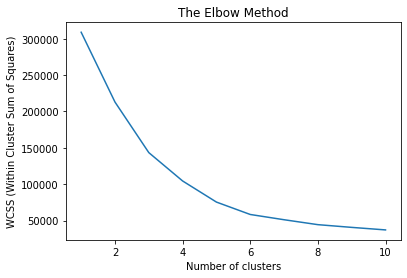

In [30]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

We find that a value of 5 would be optimal for the Clustering algorithm

Fittig the given data with 5 clusters and prediciting to which cluster they belong

In [52]:
X=data

In [67]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(data)

In [68]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

Plotting the prediction clusters

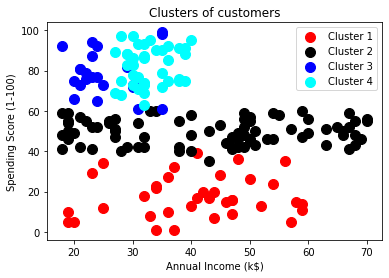

In [69]:
plt.scatter(X[y_kmeans ==0]['age'], X[y_kmeans ==0]['spending_score'], s=100, c='red',label = 'Cluster 1')
plt.scatter(X[y_kmeans ==1]['age'], X[y_kmeans ==1]['spending_score'], s=100, c='black',label = 'Cluster 2')
plt.scatter(X[y_kmeans ==2]['age'], X[y_kmeans ==2]['spending_score'], s=100, c='blue',label = 'Cluster 3')
plt.scatter(X[y_kmeans ==3]['age'],X[y_kmeans ==3]['spending_score'], s=100, c='cyan',label = 'Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Plotting an dendogram

In [70]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

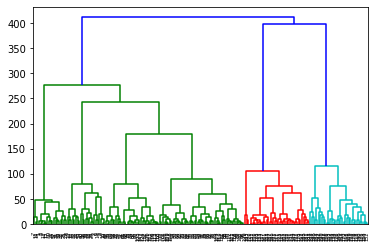

In [71]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)